1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [0]:
import numpy as np

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
b = (np.mean(X*y)- np.mean(X)*np.mean(y))/(np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

2 способ

In [5]:
n = len(X)
n

10

In [6]:
b = (n*(np.sum(X*y)) - (np.sum(X)*np.sum(y)))/(n*(np.sum(X**2)) - ((np.sum(X)**2)))
b

2.6205388824027653

In [7]:
a = np.mean(y)- b*np.mean(X)
a

444.17735732435955

In [8]:
y_hat = 444.177 + 2.6205*X
y_hat

array([535.8945, 562.0995, 942.072 , 968.277 , 548.997 , 627.612 ,
       585.684 , 837.252 , 758.637 , 732.432 ])

<function matplotlib.pyplot.show>

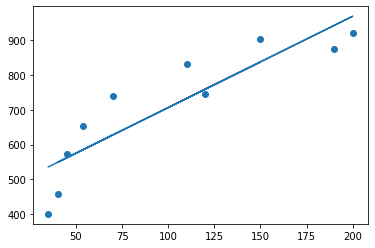

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.plot(X, 444.177 + 2.6205*X)
plt.show

In [10]:
mse=((y-y_hat)**2).sum()/n
mse

6470.414224949998

матричный вид - intercept = 0

In [0]:
import seaborn as sns

In [11]:
X = X.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
y= y.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B

array([[5.88982042]])

<function matplotlib.pyplot.show>

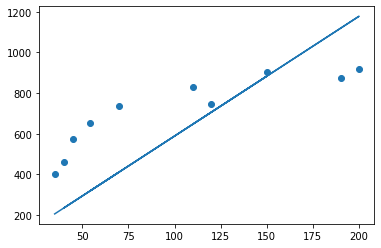

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.plot(X, 5.8898*X)
plt.show

2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [0]:
import numpy as np

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [0]:
def mse_(B1, y=y, X=X, n=10):
  return np.sum((B1*X-y)**2)/n 

In [5]:
alpha = 1e-6
alpha

1e-06

In [0]:
#mse_p = (2/n)*np.sum((B1*X - y)*X)

In [0]:
B1 = 0.1
n= 10

In [8]:
for i in range(20):
  B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
  print('B1={}'.format(B1))

B1=1.6319792141937546
B1=1.7492963645092312
B1=1.8633810519186353
B1=1.9743223411189108
B1=2.082206842789593
B1=2.187118781208843
B1=2.2891400600064395
B1=2.38835032610507
B1=2.484827031899832
B1=2.5786454957244893
B1=2.6698789606516935
B1=2.7585986516730654
B1=2.844873831303787
B1=2.9287718536551073
B1=3.0103582170169774
B1=3.089696614991865
B1=3.166848986219671
B1=3.2418755627325635
B1=3.3148349169774805
B1=3.3857840075430166


In [13]:
for i in range(160):
  B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
  if i%10==0:
    print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 10, B1=1.6319792141937546, mse=306275.7568040035
Iteration: 20, B1=2.6698789606516935, mse=199352.96411174876
Iteration: 30, B1=3.4547782236263824, mse=138204.25062502263
Iteration: 40, B1=4.04834889855975, mse=103233.54824312925
Iteration: 50, B1=4.497229618367758, mse=83233.94472982832
Iteration: 60, B1=4.836690291080364, mse=71796.25222021657
Iteration: 70, B1=5.093403362579137, mse=65255.0820486468
Iteration: 80, B1=5.287539550879594, mse=61514.21323463749
Iteration: 90, B1=5.434352720103083, mse=59374.825462025976
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 110, B1=5.629340281237233, mse=57451.59938606899
Iteration: 120, B1=5.692835432193034, mse=57051.433003054815
Iteration: 130, B1=5.740852880272922, mse=56822.57946410561
Iteration: 140, B1=5.777165500770666, mse=56691.69904907657
Iteration: 150, B1=5.804626485478126, mse=56616.849068093856


In [14]:
for i in range(3000):
  B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
  if i%500==0:
    print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=5.825393526544474, mse=56574.04266614384
Iteration: 500, B1=5.88982036492584, mse=56516.85841571945
Iteration: 1000, B1=5.889820420132642, mse=56516.8584157194
Iteration: 1500, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2000, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2500, B1=5.889820420132673, mse=56516.85841571943


In [16]:
mse_(5.88982042)

56516.85841571943

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

таблица значений функции Лапласа используется когда сигма(ср квадратичное отклонение) известна в нормальном распределении, 
а таблица критических точек распределения Стьюдента  - когда неизвестно среднее выборки из нормального распределения 

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [2]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [0]:
def mse_(B0, B1, y=y, X=X, n=10):
  return np.sum((B0+B1*X-y)**2)/n 

In [4]:
alpha = 1e-6
alpha

1e-06

In [0]:
B1 = 0.1

In [0]:
B0 = 0.1

In [0]:
n = 10

In [31]:
for i in range(3000000):
  y_b = B0+B1*X
  B0 -=alpha*(2/n)*np.sum(y_b - y)
  B1 -=alpha*(2/n)*np.sum((y_b-y)*X)
  if i%100000==0:
    print('Iteration: {i},B0={B0}, B1={B1}, mse={mse}'.format(i=i,B0=B0, B1=B1, mse=mse_(B0, B1)))

Iteration: 0,B0=444.1773566575805, B1=2.620538887310553, mse=6470.414201176662
Iteration: 100000,B0=444.17735669168655, B1=2.6205388870595216, mse=6470.414201176658
Iteration: 200000,B0=444.1773567228406, B1=2.620538886830202, mse=6470.414201176662
Iteration: 300000,B0=444.1773567512623, B1=2.6205388866210093, mse=6470.414201176656
Iteration: 400000,B0=444.17735677968403, B1=2.620538886411817, mse=6470.414201176657
Iteration: 500000,B0=444.17735680810574, B1=2.6205388862026244, mse=6470.414201176662
Iteration: 600000,B0=444.17735683324827, B1=2.620538886017552, mse=6470.414201176664
Iteration: 700000,B0=444.17735685598564, B1=2.620538885850198, mse=6470.414201176658
Iteration: 800000,B0=444.177356878723, B1=2.6205388856828438, mse=6470.414201176662
Iteration: 900000,B0=444.17735690146037, B1=2.6205388855154896, mse=6470.414201176661
Iteration: 1000000,B0=444.17735692419774, B1=2.620538885348136, mse=6470.414201176658
Iteration: 1100000,B0=444.1773569432468, B1=2.6205388852079126, mse=6

In [0]:
#остановилась уже на таких результатах  B0=444.17735716891434, B1=2.6205388835468986, mse=6470.414201176663